# Setup

In [4]:
#ausführen!!!

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

import folium #for the map view of all airports

#loading the Dataset into a pandas dataframe
df = pd.read_csv('Airlines.csv')
allAirports = pd.read_csv('hopefullyAllAirports.csv')

# Stage 1 (Analysis)
interesting charts


data head:
   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0

data shape:
(539383, 9)

data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Le

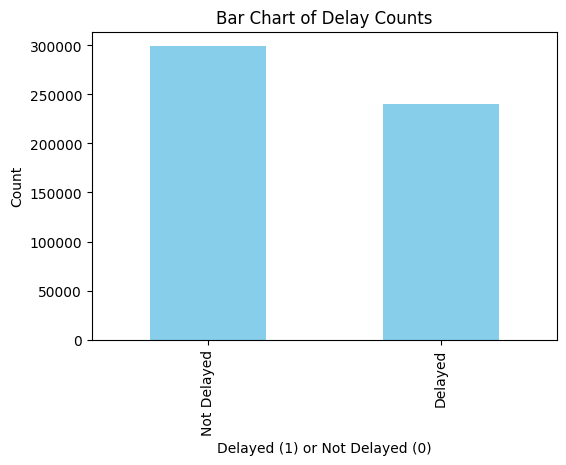

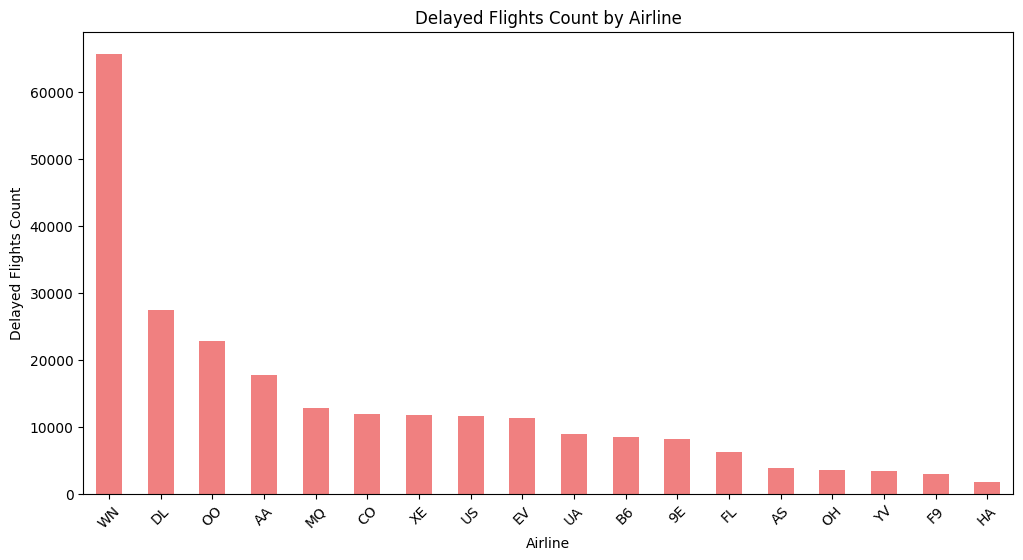

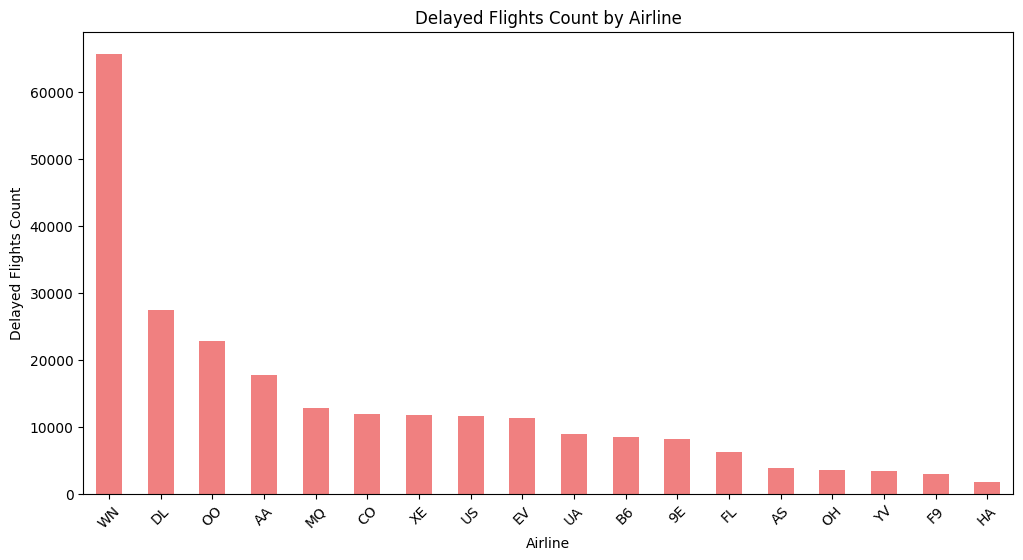

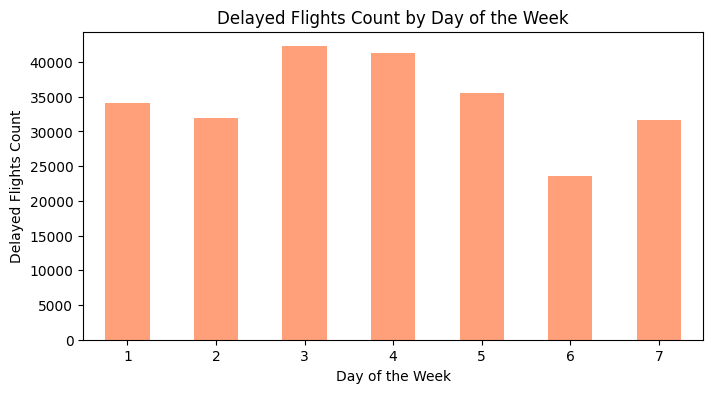

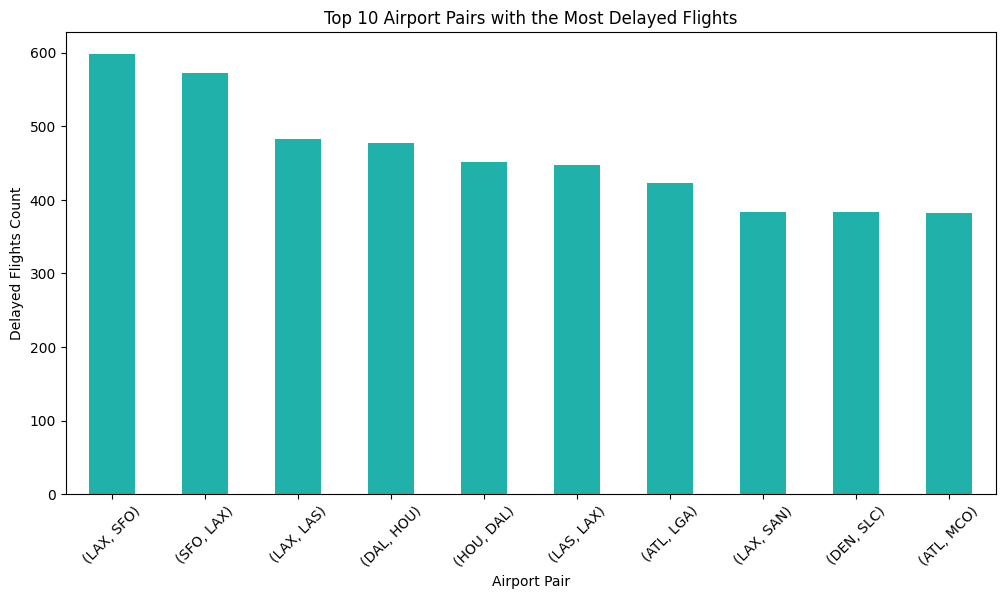

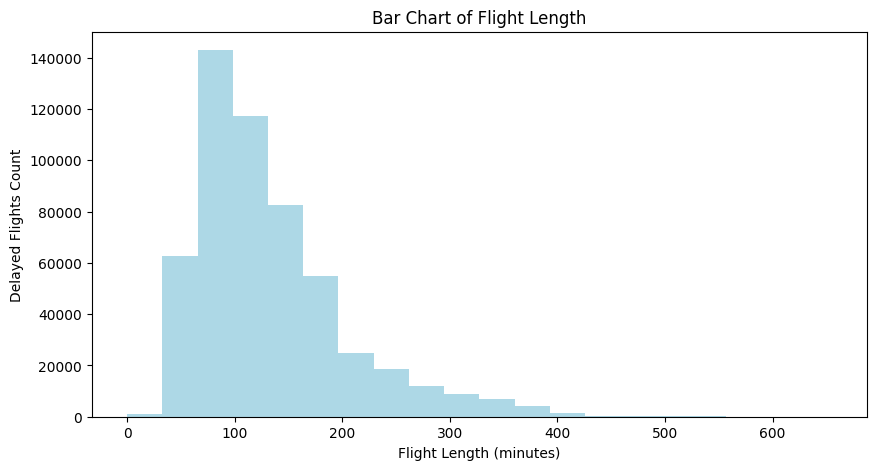

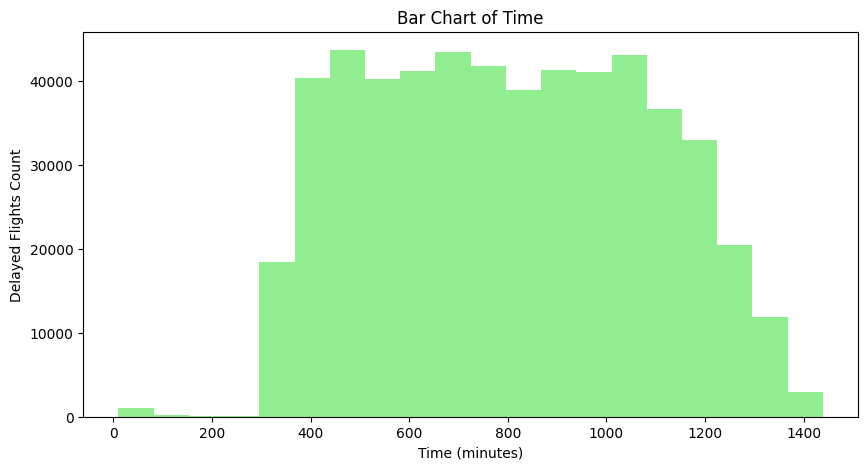

In [2]:
print("\ndata head:")
print(df.head()) #Check table composition

print("\ndata shape:")
print(df.shape) #How many entries are there? (Get height and width of Dataset)

print("\ndata info:")
print(df.info()) #Check for empty datatuple

print("\ndata discription:")
print(df.describe()) #Data visualization -> Mean etc.

#Outliers -> Only binary decision -> no problem
duplicate_values = df.duplicated()
if duplicate_values.any:
    print("\nNo duplicates")
else:    
    print("\nDuplicates found")
    print(duplicate_values)


duplicate_values = df['id'].duplicated()
if duplicate_values.any:
    print("\nNo duplicates id")
else:    
    print("\nDuplicates found id")
    print(duplicate_values)


# 1. Bar Chart of Delay Counts
delay_counts = df['Delay'].value_counts()
plt.figure(figsize=(6, 4))
delay_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Delayed (1) or Not Delayed (0)')
plt.ylabel('Count')
plt.title('Bar Chart of Delay Counts')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
plt.show()

#2. Chart of Country and Delay Count
delay_counts_by_airline = df.groupby('Airline')['Delay'].sum()
delay_counts_by_airline = delay_counts_by_airline.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
delay_counts_by_airline.plot(kind='bar', color='lightcoral')
plt.xlabel('Airline')
plt.ylabel('Delayed Flights Count')
plt.title('Delayed Flights Count by Airline')
plt.xticks(rotation=45)
plt.show()

# 3. Bar Chart of Day of the Week vs. Delay Counts
day_delay_counts = df.groupby('DayOfWeek')['Delay'].sum()
plt.figure(figsize=(8, 4))
day_delay_counts.plot(kind='bar', color='lightsalmon')
plt.xlabel('Day of the Week')
plt.ylabel('Delayed Flights Count')
plt.title('Delayed Flights Count by Day of the Week')
plt.xticks(rotation=0)
plt.show()

# 4. Bar Chart of Airport Pairs and Delay Counts
airport_pairs_delay_counts = df.groupby(['AirportFrom', 'AirportTo'])['Delay'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
airport_pairs_delay_counts.plot(kind='bar', color='lightseagreen')
plt.xlabel('Airport Pair')
plt.ylabel('Delayed Flights Count')
plt.title('Top 10 Airport Pairs with the Most Delayed Flights')
plt.xticks(rotation=45)
plt.show()

# 5. Bar Chart of Flight Length
plt.figure(figsize=(10, 5))
plt.hist(df['Length'], bins=20, color='lightblue')
plt.xlabel('Flight Length (minutes)')
plt.ylabel('Delayed Flights Count')
plt.title('Bar Chart of Flight Length')
plt.show()

# 6. Bar Chart of Time
plt.figure(figsize=(10, 5))
plt.hist(df['Time'], bins=20, color='lightgreen')
plt.xlabel('Time (minutes)')
plt.ylabel('Delayed Flights Count')
plt.title('Bar Chart of Time')
plt.show()



In [3]:
dfFrom = df["AirportFrom"].unique()
dfTo = df["AirportTo"].unique()

# Concatenate those two arrays to one
dfAirports = np.concatenate((dfFrom, dfTo), axis=None)

# Remove duplicates
dfAirports = np.unique(dfAirports)
print("\nAirports count:")
print(dfAirports.shape)

# Convert dfAirports to a DataFrame
dfAirports = pd.DataFrame({'iata_code': dfAirports})

# Convert 'iata_code' columns to strings
dfAirports['iata_code'] = dfAirports['iata_code'].astype(str)
allAirports['iata_code'] = allAirports['iata_code'].astype(str)

# Merge dataframes based on the 'iata_code' column
merged_dataframe = pd.merge(dfAirports, allAirports, on='iata_code', how='left')

print("\nmerged_dataframe:")
print(merged_dataframe)


# Extract latitude and longitude from the 'coordinates' column
merged_dataframe[['longitude', 'latitude']] = merged_dataframe['coordinates'].str.split(', ', expand=True).astype(float)

# Create a folium map centered around the first entry
m = folium.Map(location=[merged_dataframe['latitude'].iloc[0], merged_dataframe['longitude'].iloc[0]], zoom_start=10)

# Add markers for each entry
for index, row in merged_dataframe.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Display the map
m




Airports count:
(293,)

merged_dataframe:
    iata_code ident            type                                  name  \
0         ABE  KABE  medium_airport   Lehigh Valley International Airport   
1         ABI  KABI  medium_airport              Abilene Regional Airport   
2         ABQ  KABQ   large_airport     Albuquerque International Sunport   
3         ABR  KABR  medium_airport             Aberdeen Regional Airport   
4         ABY  KABY  medium_airport    Southwest Georgia Regional Airport   
..        ...   ...             ...                                   ...   
288       VPS  KVPS   large_airport        Destin-Ft Walton Beach Airport   
289       WRG  PAWG  medium_airport                      Wrangell Airport   
290       XNA  KXNA  medium_airport   Northwest Arkansas Regional Airport   
291       YAK  PAYA  medium_airport                       Yakutat Airport   
292       YUM  KNYL  medium_airport  Yuma MCAS/Yuma International Airport   

     elevation_ft continent iso_

# Stage 2 (df Preperation)

In [14]:
#ausführen!!!

# Select features and target variable
features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']
target = 'Delay'

X = df[features]
y = df[target]

# Randomly split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing

# Combine the training and testing data to ensure consistent one-hot encoding
combined_data = pd.concat([X_train, X_test])


# Display the first few rows of each split dfFrame
print("Training Set:")
print(X_train.head())

print("\nTraining Set Delay:")
print(y_train.head())

print("Training Set:")
print(X_test.head())

print("\nTesting Set Delay:")
print(y_test.head())


# Define the categorical and numeric features
categorical_features = ['Airline', 'AirportFrom', 'AirportTo']
numeric_features = ['DayOfWeek', 'Time', 'Length']

#------------------------------------------------------------

pre_df = pd.get_dummies(df,categorical_features,drop_first=True)
pre_df.head()

X = pre_df.drop('Delay', axis=1)
y = pre_df['Delay']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Training Set:
       Airline AirportFrom AirportTo  DayOfWeek  Time  Length
498081      F9         PDX       DEN          3   900     143
203828      WN         SAN       SJC          7  1185      80
156549      AA         LGA       DFW          5   365     250
66053       DL         BOS       MSP          6  1090     207
165376      FL         CMH       RSW          5   818     150

Training Set Delay:
498081    0
203828    1
156549    1
66053     0
165376    1
Name: Delay, dtype: int64
Training Set:
       Airline AirportFrom AirportTo  DayOfWeek  Time  Length
442150      OO         SMF       LAX          7   881      85
229730      UA         DEN       LGA          2   665     223
69994       WN         OAK       LAS          7   465      85
414293      B6         JFK       CLT          5   990     131
171704      AS         SEA       FAI          5  1150     235

Testing Set Delay:
442150    1
229730    1
69994     1
414293    0
171704    1
Name: Delay, dtype: int64
Accuracy: 0.646

In [20]:
#K-Nearest-Neighbors
k_range = 3
for k in range(k_range):
    k = k+1
    knn_estimator = KNeighborsClassifier(k)
    knn_estimator.fit(X_train, y_train)
    predicted_knn = knn_estimator.predict(X_train)
    print("Testset Target: ", y_test)
    print("Prediction: ", predicted_knn)
    print("Accuracy for k = ", k, " ", accuracy_score(y_test, predicted_knn))


Da es Zellen ohne Inhalt gibt, weil nicht jeder Flug jeden Flughafen anfliegt, kann man K-Nearest-Neighbor nicht nutzen. Die Fehlermeldung empfiehlt einen Estimator zu nutzen, der NaN Werte verarbeiten kann. Darunter zählt z.B. der Decision Tree Classifier.
Man könnte auch die Zeilen/Spalten mit NaN Werten löschen, jedoch nur die ganze Zeile/Spalte, aber in jeder Zeile/Spalte gibt es ja noch einen Wert.
Man könnte auch die NaN Werte sinnvoll durch 0.0 oder 1.0 ersetzen (muss binary sein, deswegen nur die zwei), was aber bedeuten würde, dass man erfindet, ob ein Flugzeug, was den Flughafen gar nicht anfliegt zu spät kommt, oder nicht. Das würde die Daten sehr verändern.

In [ ]:
max_tree_depth = 5 # max_depth=10 drinne lassen ???? ist nur drin, damit man es einfacher anpassen kann

# Create a Decision Tree classifier within a pipeline
clf = Pipeline([
    ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth,random_state=42)) 
])

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6392836285769905


Max Depth: 14, Accuracy: 0.6694846908979671
Max Depth: 15, Accuracy: 0.672228556596865
Max Depth: 16, Accuracy: 0.6726271587085292
Max Depth: 17, Accuracy: 0.6718670337514021
Max Depth: 18, Accuracy: 0.6725159209099252


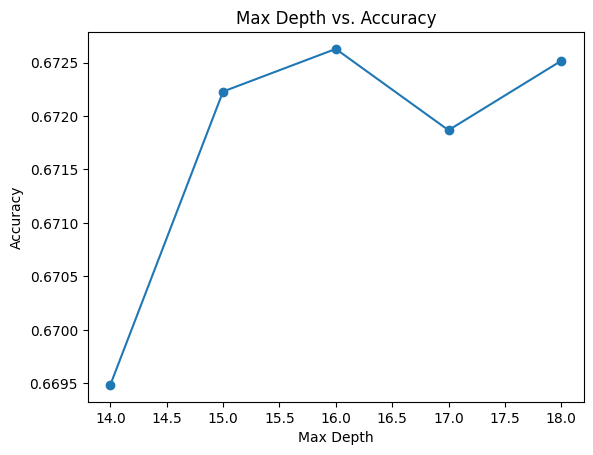

In [17]:
# just for testing 

# Create arrays to store max_depth and corresponding accuracies
depths = []
accuracies = []

# Loop through max depths from 1 to 10
for max_tree_depth in range(14, 19):

    # Create a Decision Tree classifier within a pipeline
    clf = Pipeline([
        ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth, random_state=42))
    ])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Max Depth: {max_tree_depth}, Accuracy: {accuracy}")

    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(depths, accuracies, marker='o')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

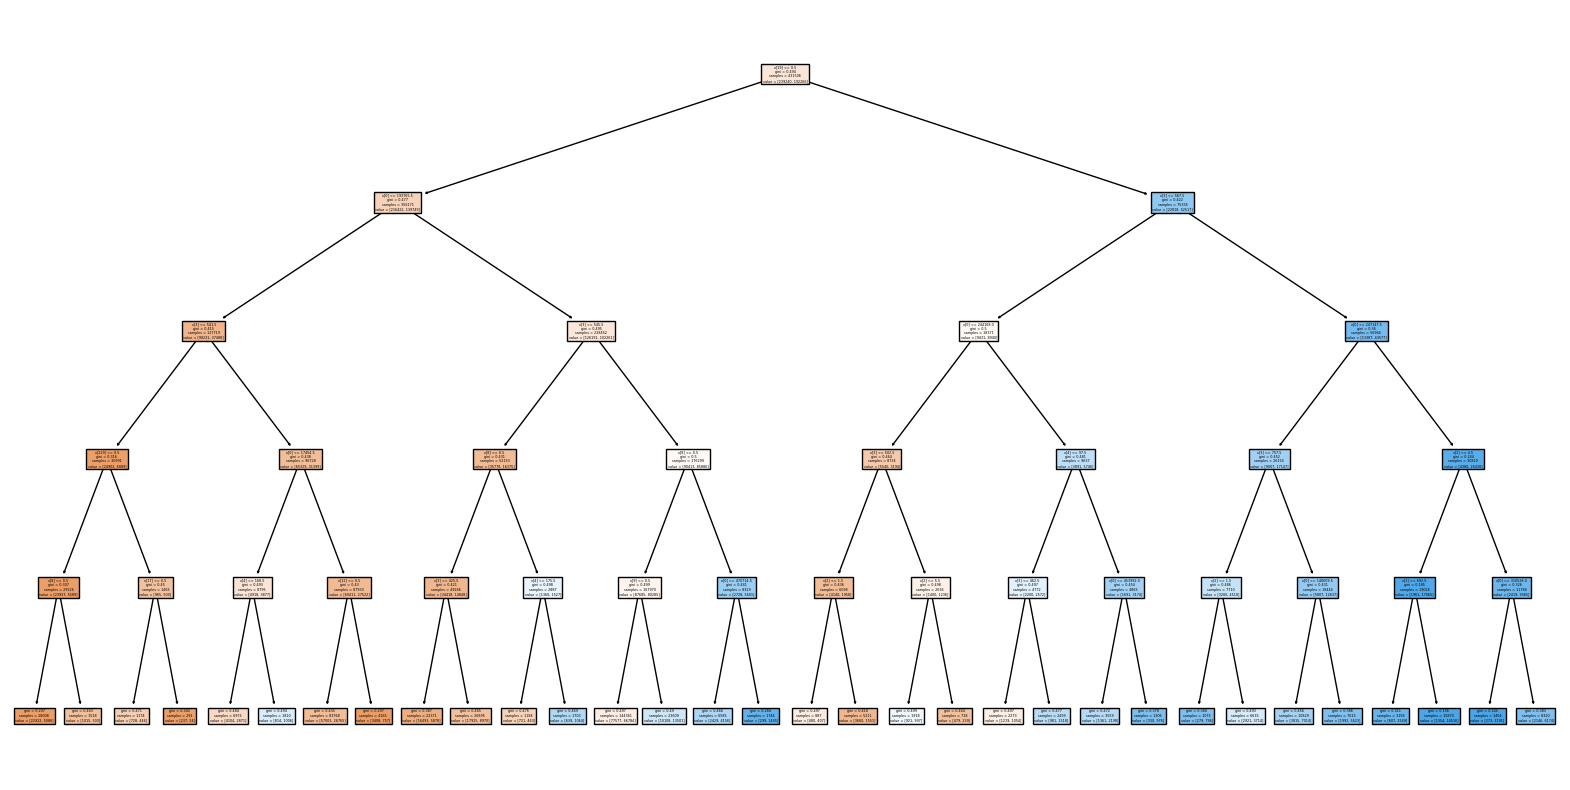

In [15]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf['classifier'], filled=True)
plt.show()


In [18]:
#Naive Bayes Classifier

# Build a Gaussian Classifier


In [12]:
#Test the Accuracy of the Classifier


model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.5999425271373879
F1 Score: 0.6113110558582375
